<a href="https://colab.research.google.com/github/Samikshya-mohanty/datascience_assignments/blob/main/Python_DataAnalysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df_cards = pd.read_csv("/content/cards_data.csv")
df_trans = pd.read_csv("/content/transactions_data.csv")
df_users = pd.read_csv("/content/users_data.csv")


In [15]:
df_cards.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


## Ensure Numeric values for core continuous columns. If not numeric then
convert them into appropriate int and float datatypes.

In [16]:
# All the numeric datatype looks fine here

df_cards.dtypes

,0
id,int64
client_id,int64
card_brand,object
card_type,object
card_number,int64
expires,object
cvv,int64
has_chip,object
num_cards_issued,int64
credit_limit,object


In [17]:
df_trans.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,$46.21,Online Transaction,15143,ONLINE,NaN,NaN,4784,NaN
1,7475582,2010-01-01 06:03:00,511,974,$3.33,Swipe Transaction,20519,Phoenix,AZ,85015.0,5942,NaN
2,7475752,2010-01-01 06:52:00,1718,2029,$10.60,Swipe Transaction,20519,Spring Valley,CA,91977.0,5942,NaN
3,7475819,2010-01-01 07:08:00,511,1038,$21.50,Swipe Transaction,79038,Phoenix,AZ,85015.0,7538,NaN
4,7475828,2010-01-01 07:09:00,1094,3755,$80.00,Swipe Transaction,27092,Boyne City,MI,49712.0,4829,NaN


In [50]:
df_trans['date'] = pd.to_datetime(df_trans['date'])
df_trans.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,Online,UNKNOWN,85711,4784,No Error
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015,5942,No Error
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977,5942,No Error
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015,7538,No Error
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712,4829,No Error


In [18]:
# All the numeric datatype looks fine here

df_trans.dtypes

,0
id,int64
date,object
client_id,int64
card_id,int64
amount,object
use_chip,object
merchant_id,int64
merchant_city,object
merchant_state,object
zip,float64


In [19]:
df_users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [20]:
# # All the numeric datatype looks fine here

df_users.dtypes

,0
id,int64
current_age,int64
retirement_age,int64
birth_year,int64
birth_month,int64
gender,object
address,object
latitude,float64
longitude,float64
per_capita_income,object


## Check Data Hygiene throughout the data e.g. Turn “amount” column (with \$
signs) into a clean number column. “\$46.26” ---🡪 46.26

In [21]:
def remove_dollar(s:str):
  if s is None:
    return None
  elif type(s) == float:
    return s
  elif s[0] == '$':
    return float(s[1:])
  elif s[0] != '$' and not s[0].isdigit():
    return None
  else:
    return float(s)
remove_dollar('hdaiusa')


In [22]:

df_cards['credit_limit']= df_cards['credit_limit'].apply(remove_dollar)
df_cards.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,21968.0,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,46414.0,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,12400.0,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,28.0,09/2008,2009,No


In [23]:
df_trans['amount'] = df_trans['amount'].apply(remove_dollar)
df_trans.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,Online Transaction,15143,ONLINE,NaN,NaN,4784,NaN
1,7475582,2010-01-01 06:03:00,511,974,3.33,Swipe Transaction,20519,Phoenix,AZ,85015.0,5942,NaN
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,Swipe Transaction,20519,Spring Valley,CA,91977.0,5942,NaN
3,7475819,2010-01-01 07:08:00,511,1038,21.50,Swipe Transaction,79038,Phoenix,AZ,85015.0,7538,NaN
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,Swipe Transaction,27092,Boyne City,MI,49712.0,4829,NaN


In [24]:
df_users['per_capita_income'] = df_users['per_capita_income'].apply(remove_dollar)
df_users['yearly_income'] = df_users['yearly_income'].apply(remove_dollar)
df_users['total_debt'] = df_users['total_debt'].apply(remove_dollar)




df_users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278.0,59696.0,127613.0,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891.0,77254.0,191349.0,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145.0,249925.0,202328.0,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797.0,109687.0,183855.0,675,1


## Check how many duplicate rows are there, handle them

In [25]:
# The datasets has no duplicates
print(df_cards.duplicated().sum(),
df_trans.duplicated().sum(),
df_users.duplicated().sum())


0 0 0


## Display number and columns having missing values. Also visualize and then finally handle them with appropriate action.

<Axes: >

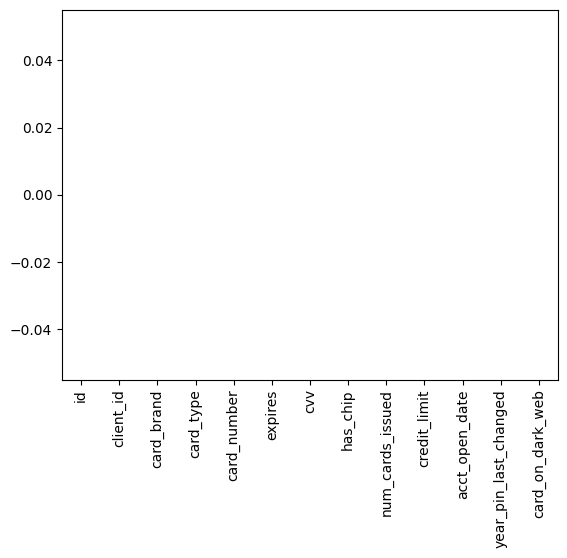

In [26]:
df_cards.isna().sum().plot(kind = 'bar')

<Axes: >

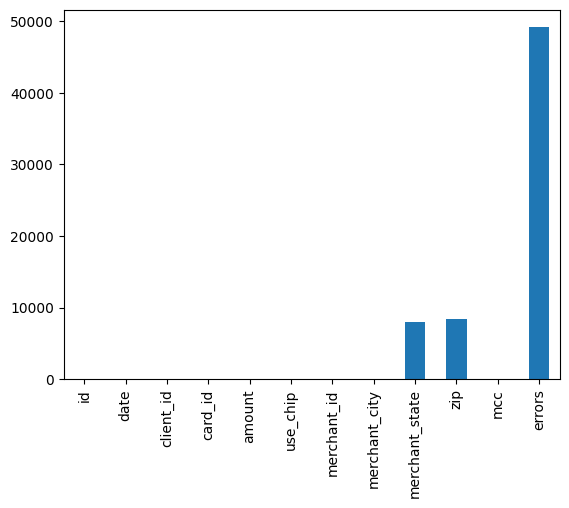

In [27]:
df_trans.isna().sum().plot(kind = 'bar')

In [28]:
df_trans['errors'].isna()

,errors
0,True
1,True
2,True
3,True
4,True
...,...
49995,True
49996,True
49997,True
49998,True


In [29]:
df_trans['errors'].fillna('No Error', inplace=True)
df_trans.head()

/tmp/ipython-input-342506623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans['errors'].fillna('No Error', inplace=True)


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,Online Transaction,15143,ONLINE,NaN,NaN,4784,No Error
1,7475582,2010-01-01 06:03:00,511,974,3.33,Swipe Transaction,20519,Phoenix,AZ,85015.0,5942,No Error
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,Swipe Transaction,20519,Spring Valley,CA,91977.0,5942,No Error
3,7475819,2010-01-01 07:08:00,511,1038,21.50,Swipe Transaction,79038,Phoenix,AZ,85015.0,7538,No Error
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,Swipe Transaction,27092,Boyne City,MI,49712.0,4829,No Error


In [30]:
df_trans['merchant_state'].fillna('Unknown', inplace=True)
df_trans.head()

/tmp/ipython-input-1848964871.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans['merchant_state'].fillna('Unknown', inplace=True)


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,Online Transaction,15143,ONLINE,Unknown,NaN,4784,No Error
1,7475582,2010-01-01 06:03:00,511,974,3.33,Swipe Transaction,20519,Phoenix,AZ,85015.0,5942,No Error
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,Swipe Transaction,20519,Spring Valley,CA,91977.0,5942,No Error
3,7475819,2010-01-01 07:08:00,511,1038,21.50,Swipe Transaction,79038,Phoenix,AZ,85015.0,7538,No Error
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,Swipe Transaction,27092,Boyne City,MI,49712.0,4829,No Error


In [31]:
df_trans['zip'].fillna(df_trans['zip'].mode()[0], inplace=True)
df_trans.head()

/tmp/ipython-input-1993390444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans['zip'].fillna(df_trans['zip'].mode()[0], inplace=True)


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,Online Transaction,15143,ONLINE,Unknown,85711.0,4784,No Error
1,7475582,2010-01-01 06:03:00,511,974,3.33,Swipe Transaction,20519,Phoenix,AZ,85015.0,5942,No Error
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,Swipe Transaction,20519,Spring Valley,CA,91977.0,5942,No Error
3,7475819,2010-01-01 07:08:00,511,1038,21.50,Swipe Transaction,79038,Phoenix,AZ,85015.0,7538,No Error
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,Swipe Transaction,27092,Boyne City,MI,49712.0,4829,No Error


In [32]:
df_trans.isna().isna().sum()

,0
id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,0
zip,0


<Axes: >

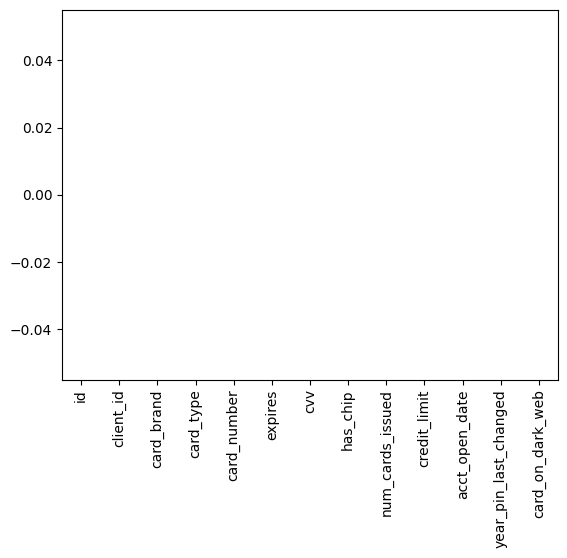

In [33]:
# no missing values in this dataset
df_cards.isna().sum().plot(kind = 'bar')

### 5. Convert the use_chip column to have only three values: swipe, chip, or online.

In [34]:
def simplify_use_chip(chip_type):
  if 'swipe' in chip_type.lower():
    return 'swipe'
  elif 'online' in chip_type.lower():
    return 'online'
  else:
    return 'chip'

df_trans['use_chip'] = df_trans['use_chip'].apply(simplify_use_chip)
print(df_trans['use_chip'].value_counts())

use_chip
swipe     41992
online     8008
Name: count, dtype: int64


### How can you clean up city names, so they don’t have extra spaces and always start with capital letters?

In [35]:
df_trans

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,ONLINE,Unknown,85711.0,4784,No Error
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015.0,5942,No Error
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977.0,5942,No Error
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015.0,7538,No Error
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712.0,4829,No Error
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11865834,2012-10-29 10:45:00,153,107,137.14,swipe,7777,Los Angeles,CA,90005.0,3684,No Error
49996,11865927,2012-10-29 11:04:00,1718,5144,12.09,swipe,23695,West Covina,CA,91792.0,5411,No Error
49997,11866093,2012-10-29 11:42:00,153,107,43.31,swipe,94123,Page,AZ,86040.0,5310,No Error
49998,11866339,2012-10-29 12:33:00,1116,301,124.76,swipe,60569,Warrington,PA,18976.0,5300,No Error


In [36]:
df_trans['merchant_city'] = df_trans['merchant_city'].str.strip().str.title()
df_trans.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,Online,Unknown,85711.0,4784,No Error
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015.0,5942,No Error
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977.0,5942,No Error
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015.0,7538,No Error
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712.0,4829,No Error


###7. Make sure state codes are always two capital letters (like CA, NY)?

In [37]:
df_trans['merchant_state'].head()

,merchant_state
0,Unknown
1,AZ
2,CA
3,AZ
4,MI


In [38]:
df_trans['merchant_state'] = df_trans['merchant_state'].astype(str).str.strip().str.upper()

In [39]:
df_trans.tail()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
49995,11865834,2012-10-29 10:45:00,153,107,137.14,swipe,7777,Los Angeles,CA,90005.0,3684,No Error
49996,11865927,2012-10-29 11:04:00,1718,5144,12.09,swipe,23695,West Covina,CA,91792.0,5411,No Error
49997,11866093,2012-10-29 11:42:00,153,107,43.31,swipe,94123,Page,AZ,86040.0,5310,No Error
49998,11866339,2012-10-29 12:33:00,1116,301,124.76,swipe,60569,Warrington,PA,18976.0,5300,No Error
49999,11866448,2012-10-29 12:55:00,1116,79,7.30,swipe,74096,Telford,PA,18969.0,5812,No Error


### 8. How do you turn ZIP codes into a proper 5-digit string, keeping leading zeros?

*   List item
*   List item



In [40]:
df_trans['zip'] = df_trans['zip'].astype(int).astype(str).str.zfill(5)
df_trans

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,Online,UNKNOWN,85711,4784,No Error
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015,5942,No Error
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977,5942,No Error
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015,7538,No Error
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712,4829,No Error
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11865834,2012-10-29 10:45:00,153,107,137.14,swipe,7777,Los Angeles,CA,90005,3684,No Error
49996,11865927,2012-10-29 11:04:00,1718,5144,12.09,swipe,23695,West Covina,CA,91792,5411,No Error
49997,11866093,2012-10-29 11:42:00,153,107,43.31,swipe,94123,Page,AZ,86040,5310,No Error
49998,11866339,2012-10-29 12:33:00,1116,301,124.76,swipe,60569,Warrington,PA,18976,5300,No Error


### Customer Card Profile:
• Explore the user matrix across card_brand, card_type and credit_limit.
• Visualize using appropriate graphs for them.
• Extract insights and recommend actions.

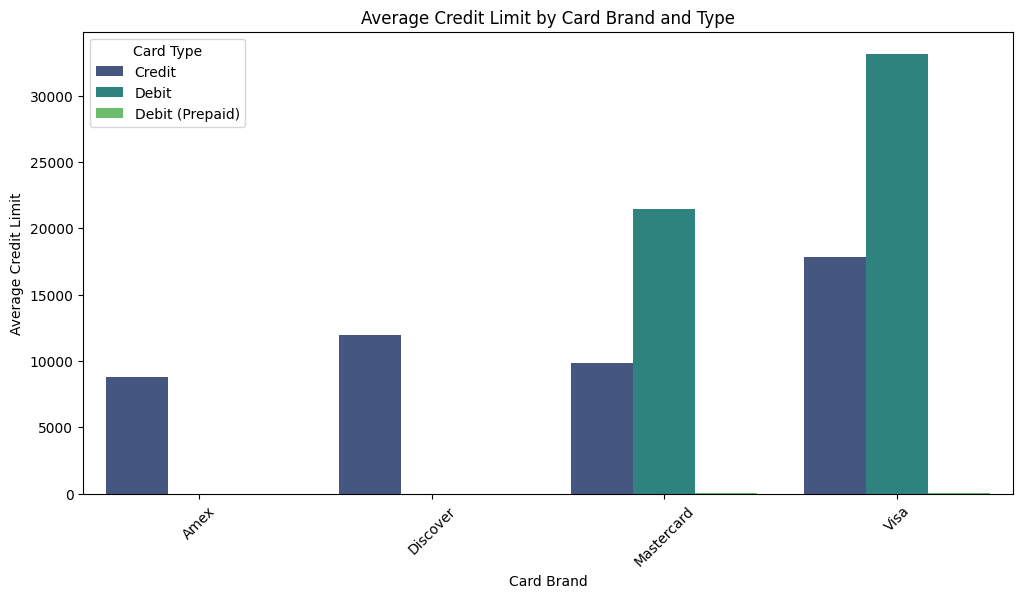

In [41]:
card_profile = df_cards.groupby(['card_brand', 'card_type'])['credit_limit'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=card_profile, x='card_brand', y='credit_limit', hue='card_type', palette='viridis')
plt.title('Average Credit Limit by Card Brand and Type')
plt.xlabel('Card Brand')
plt.ylabel('Average Credit Limit')
plt.xticks(rotation=45)
plt.legend(title='Card Type')
plt.show()

### Explore Transactions:
• What is the time frame of the data collected’
• Which client has spent the most amount.
• Highest and lowest transactions amounts spent
• Transactions amounts within use_chip category
• Use appropriate Graphs and extract insights.

In [42]:
max_time = df_trans['date'].max()
min_time = df_trans['date'].min()
print(f"The data is collected from {min_time} to {max_time}")


The data is collected from 2010-01-01 04:45:00 to 2012-10-29 12:55:00


In [43]:
highest_transaction = df_trans['amount'].max()
lowest_transaction = df_trans['amount'].min()

print(f"Highest transaction amount: ${highest_transaction:.2f}")
print(f"Lowest transaction amount: ${lowest_transaction:.2f}")

Highest transaction amount: $6820.20
Lowest transaction amount: $-500.00


<Axes: xlabel='client_id'>

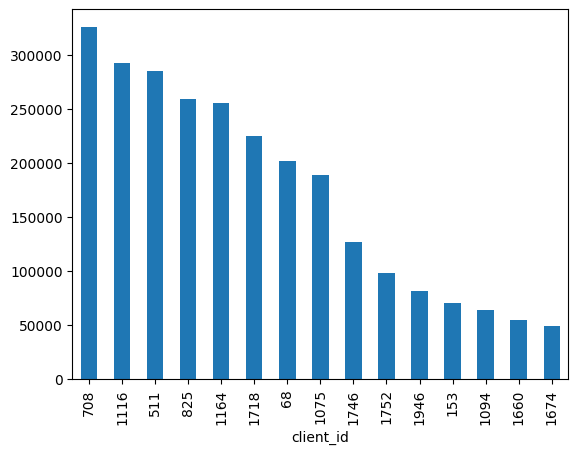

In [44]:
# client_id : 708 has spent the maximum amount.
df_trans.groupby('client_id')['amount'].sum().sort_values(ascending=False).plot(kind = 'bar')

<Axes: xlabel='use_chip'>

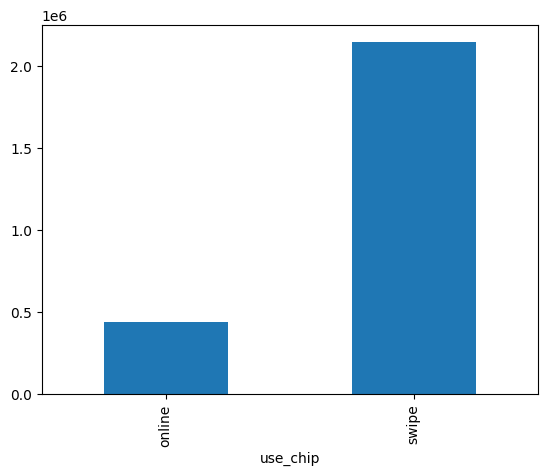

In [45]:
# Swipe has the transactions amounts within use_chip category
df_trans.head()
df_trans.groupby('use_chip')['amount'].sum().plot(kind = 'bar')

### Customer Spend Profile vs. Credit Health
• For each client_id, compute: total spend, average ticket size, transaction
count, and monthly frequency.
• Create a dataframe for credit_score, yearly_income, total_debt,
num_credit_cards.
• Visualize their co-operation.
• Plot Scatter of average amount spent vs yearly_income.

In [46]:
df_trans.groupby('client_id').aggregate({'amount':'sum'})

,amount
client_id,
68,202013.82
153,70806.08
511,285794.61
708,326179.31
825,259484.68
1075,189013.46
1094,63905.02
1116,293318.64
1164,255902.02


In [47]:
df_trans.groupby('client_id').aggregate({'amount':'mean'})

,amount
client_id,
68,57.098310
153,55.447204
511,43.646092
708,132.917404
825,81.088962
1075,35.482159
1094,42.125920
1116,67.507167
1164,98.689556


In [53]:
df_trans['trans_month'] = df_trans['date'].dt.strftime('%Y-%m')
df_trans.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,trans_month
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,Online,UNKNOWN,85711,4784,No Error,2010-01
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015,5942,No Error,2010-01
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977,5942,No Error,2010-01
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015,7538,No Error,2010-01
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712,4829,No Error,2010-01


<Axes: ylabel='Frequency'>

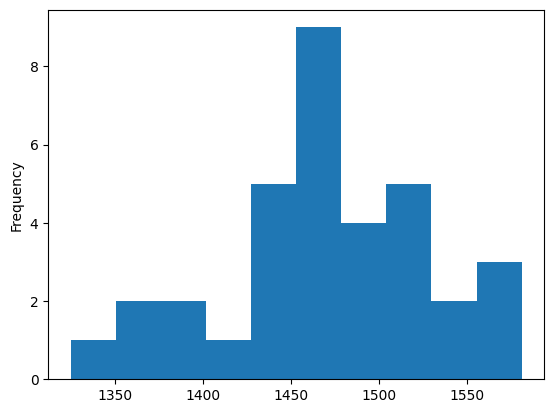

In [72]:
df_trans.groupby('trans_month')['client_id'].count().plot(kind = 'hist')


In [57]:
df_users.head()
merged_df = pd.merge(df_trans, df_users, on='id',how='left')

In [58]:
merged_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,Online,UNKNOWN,85711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='client_id'>

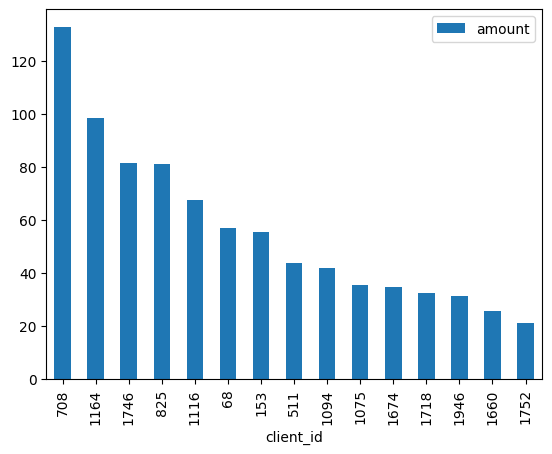

In [75]:
merged_df.groupby('client_id').aggregate({'amount':'mean'}).sort_values(by = 'amount',ascending=False).plot(kind = 'bar')

In [59]:
df_credit_health = df_users[['credit_score', 'yearly_income', 'total_debt', 'num_credit_cards']]
df_credit_health.head()

,credit_score,yearly_income,total_debt,num_credit_cards
0,787,59696.0,127613.0,5
1,701,77254.0,191349.0,5
2,698,33483.0,196.0,5
3,722,249925.0,202328.0,4
4,675,109687.0,183855.0,1


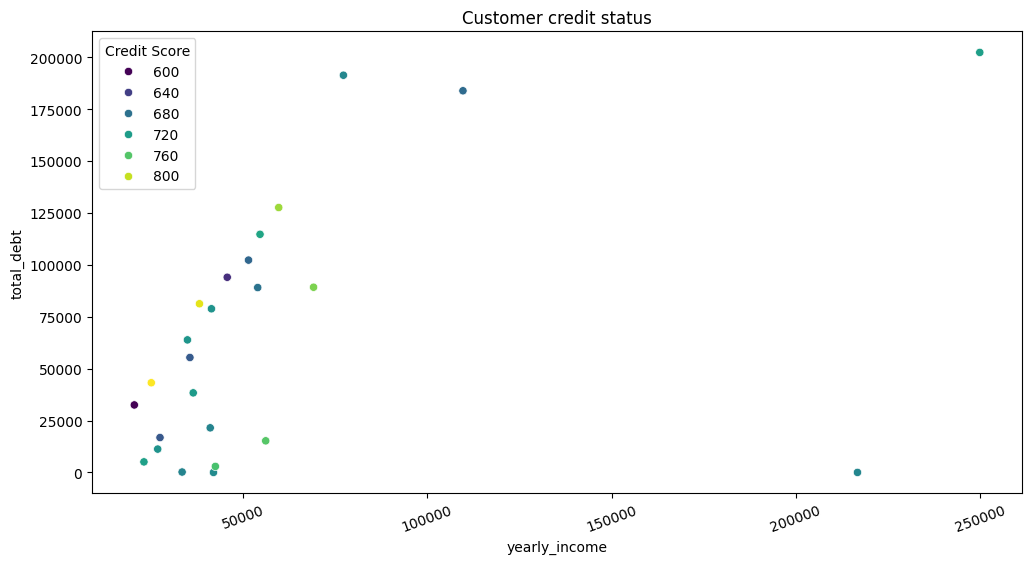

In [80]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_users, x='yearly_income', y='total_debt', hue='credit_score', palette='viridis')
plt.title('Customer credit status')
plt.xlabel('yearly_income')
plt.ylabel('total_debt')
plt.xticks(rotation=20)
plt.legend(title='Credit Score')
plt.show()

In [67]:
merged_df = pd.merge(df_trans, df_users, left_on='client_id', right_on='id', how='left')
average_spent_per_client = merged_df.groupby('client_id')['amount'].mean().reset_index()
average_spent_per_client.head()

,client_id,amount
0,68,57.098310
1,153,55.447204
2,511,43.646092
3,708,132.917404
4,825,81.088962


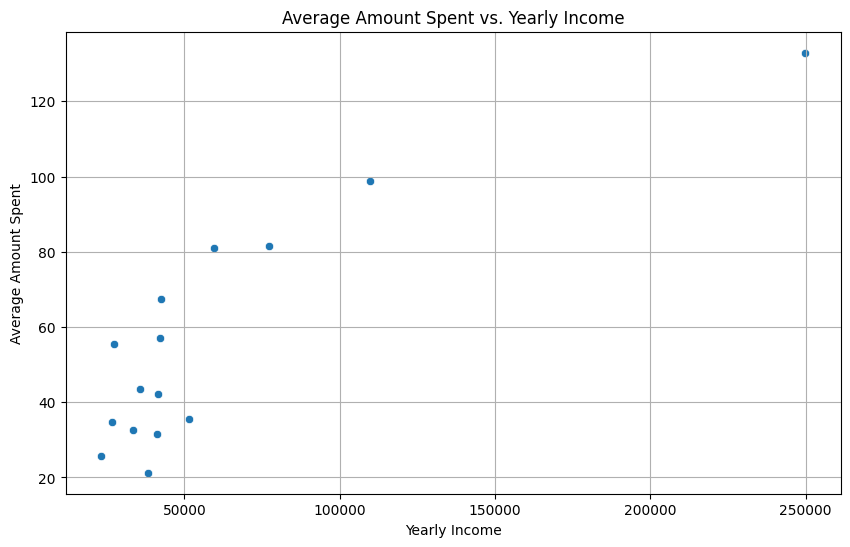

In [68]:
merged_spend_income = pd.merge(average_spent_per_client, df_users, left_on='client_id', right_on='id', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_spend_income, x='yearly_income', y='amount')
plt.title('Average Amount Spent vs. Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Average Amount Spent')
plt.grid(True)
plt.show()

In [70]:
df_users.head()
age_merged_df = pd.merge(df_trans, df_users, left_on='client_id', right_on='id', how='left')
age_merged_df.head()

,id_x,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,Online,UNKNOWN,85711,...,11,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015,...,10,Male,153 Tenth Lane,32.21,-110.88,17460.0,35602.0,55369.0,661,5
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977,...,11,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015,...,10,Male,153 Tenth Lane,32.21,-110.88,17460.0,35602.0,55369.0,661,5
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712,...,10,Male,74786 Jefferson Drive,44.75,-85.60,20325.0,41442.0,78833.0,712,3


Share of Customers in Each Age Band:
 age_band
18-24    0.12
25-34    0.24
35-44    0.16
45-54    0.20
55-64    0.04
65-74    0.08
75-84    0.16
85-94    0.00
Name: proportion, dtype: float64

Average Credit Limit by Age Band:
   age_band  credit_limit
0    18-24  35299.333333
1    25-34  13548.000000
2    35-44  13798.615385
3    45-54  15102.111111
4    55-64  89081.000000
5    65-74   9756.285714
6    75-84  21144.125000
7    85-94           NaN


/tmp/ipython-input-1797484843.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_credit_limit_by_age_band = users_cards_merged.groupby('age_band')['credit_limit'].mean().reset_index()
/tmp/ipython-input-1797484843.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_band_distribution.index, y=age_band_distribution.values * 100, palette='viridis')


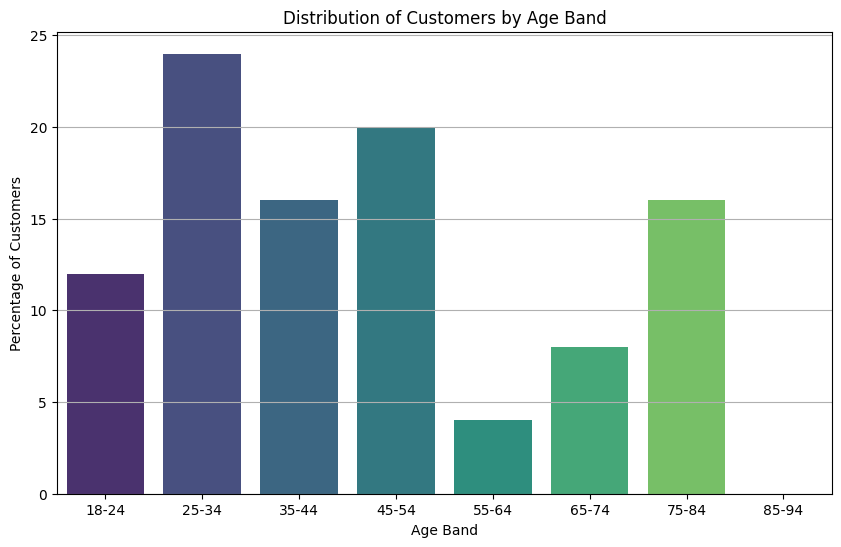

/tmp/ipython-input-1797484843.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_credit_limit_by_age_band, x='age_band', y='credit_limit', palette='magma')


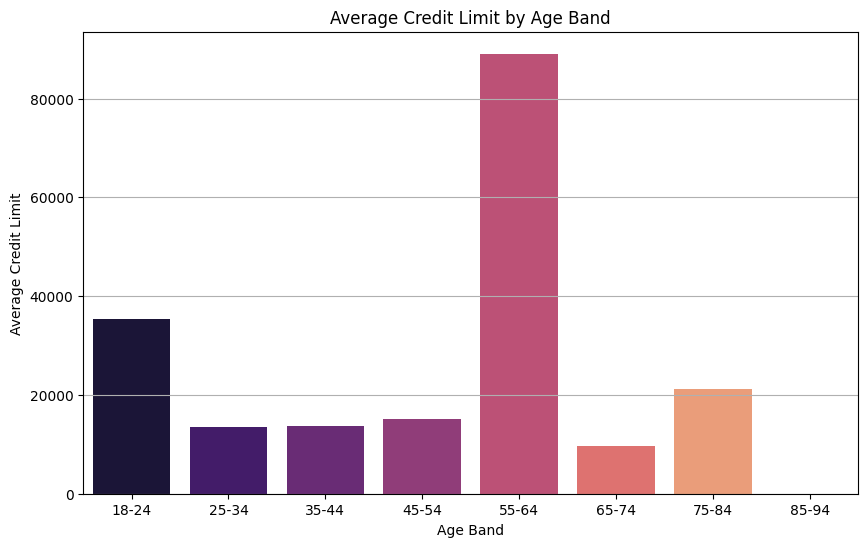

In [71]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94']

df_users['age_band'] = pd.cut(df_users['current_age'], bins=age_bins, labels=age_labels, right=False)

age_band_distribution = df_users['age_band'].value_counts(normalize=True).sort_index()
print("Share of Customers in Each Age Band:\n", age_band_distribution)

users_cards_merged = pd.merge(df_users, df_cards, left_on='id', right_on='client_id', how='left')

average_credit_limit_by_age_band = users_cards_merged.groupby('age_band')['credit_limit'].mean().reset_index()
print("\nAverage Credit Limit by Age Band:\n", average_credit_limit_by_age_band)

plt.figure(figsize=(10, 6))
sns.barplot(x=age_band_distribution.index, y=age_band_distribution.values * 100, palette='viridis')
plt.title('Distribution of Customers by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Percentage of Customers')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_credit_limit_by_age_band, x='age_band', y='credit_limit', palette='magma')
plt.title('Average Credit Limit by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Average Credit Limit')
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-396038411.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chip_usage_by_age = age_merged_df.groupby(['age_band', 'use_chip']).size().unstack(fill_value=0)


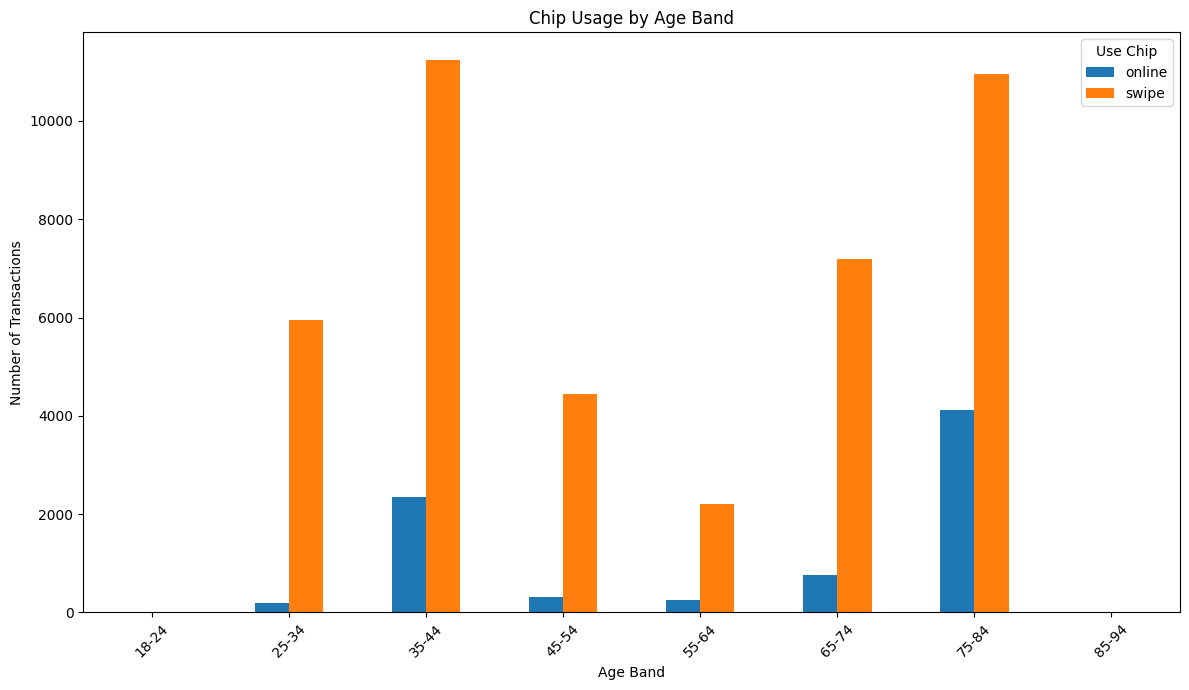

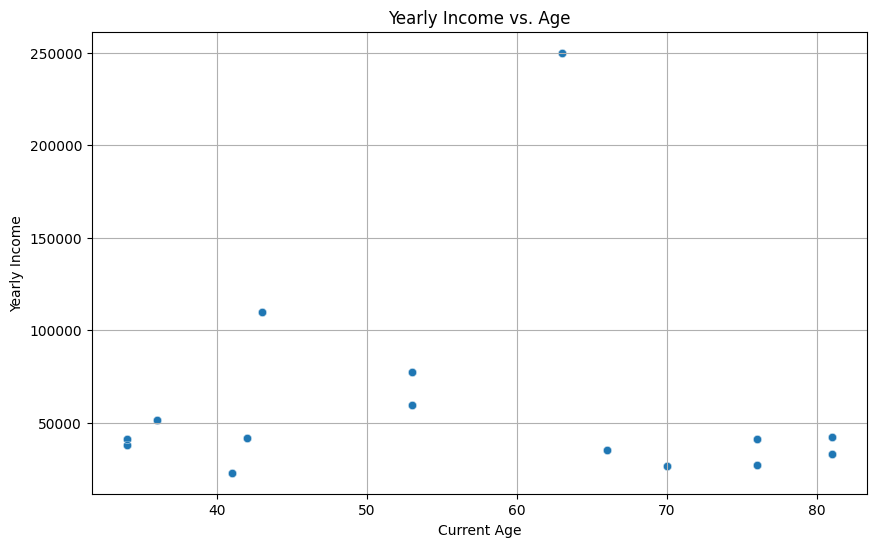

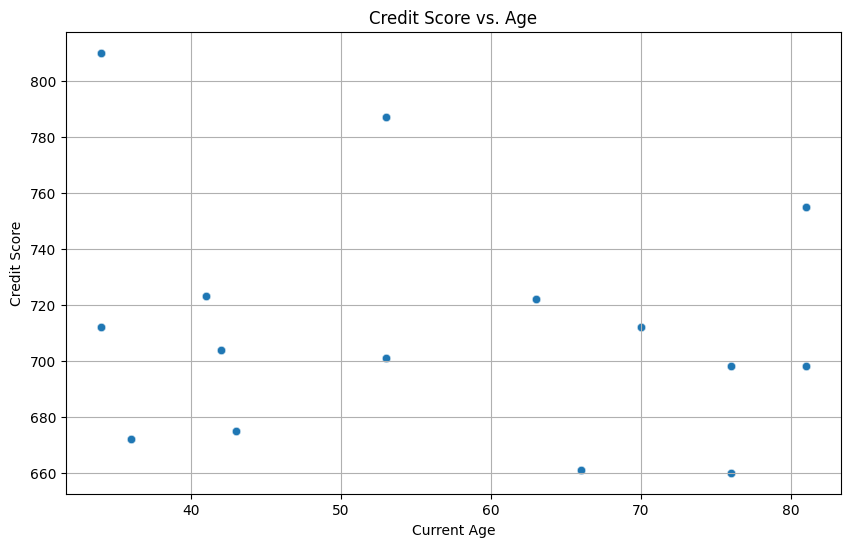

/tmp/ipython-input-396038411.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  online_transactions_by_age = age_merged_df[age_merged_df['use_chip'] == 'online'].groupby('age_band').size()
/tmp/ipython-input-396038411.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_transactions_by_age = age_merged_df.groupby('age_band').size()
/tmp/ipython-input-396038411.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_percentage_by_age.index, y=onlin


Percentage of Online Transactions by Age Band:
 age_band
18-24     0.000000
25-34     3.189585
35-44    17.345588
45-54     6.575630
55-64     9.942950
65-74     9.685930
75-84    27.352298
85-94     0.000000
dtype: float64


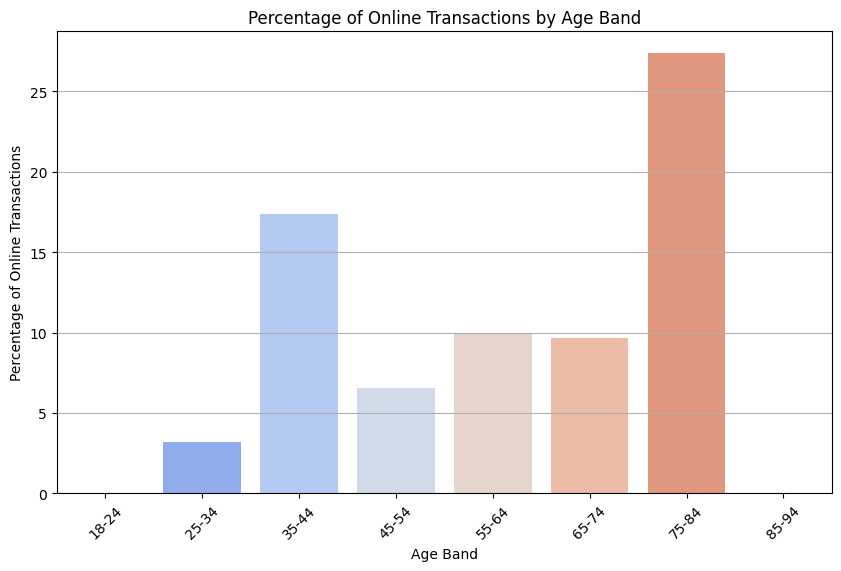

In [81]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94']

age_merged_df['age_band'] = pd.cut(age_merged_df['current_age'], bins=age_bins, labels=age_labels, right=False)

chip_usage_by_age = age_merged_df.groupby(['age_band', 'use_chip']).size().unstack(fill_value=0)
chip_usage_by_age.plot(kind='bar', figsize=(12, 7))
plt.title('Chip Usage by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Use Chip')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_merged_df.dropna(subset=['yearly_income', 'current_age']), x='current_age', y='yearly_income', alpha=0.6)
plt.title('Yearly Income vs. Age')
plt.xlabel('Current Age')
plt.ylabel('Yearly Income')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_merged_df.dropna(subset=['credit_score', 'current_age']), x='current_age', y='credit_score', alpha=0.6)
plt.title('Credit Score vs. Age')
plt.xlabel('Current Age')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

online_transactions_by_age = age_merged_df[age_merged_df['use_chip'] == 'online'].groupby('age_band').size()
total_transactions_by_age = age_merged_df.groupby('age_band').size()

online_percentage_by_age = (online_transactions_by_age / total_transactions_by_age).fillna(0) * 100
print("\nPercentage of Online Transactions by Age Band:\n", online_percentage_by_age)

plt.figure(figsize=(10, 6))
sns.barplot(x=online_percentage_by_age.index, y=online_percentage_by_age.values, palette='coolwarm')
plt.title('Percentage of Online Transactions by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Percentage of Online Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Gender Analysis:
• Avg transaction amount by gender.
• Time-of-day / day-of-week profiles: does one group spend more at
night/weekends?
• Visualize with appropriate graphs.
• Suggest marketing campaign ideas.

<Axes: xlabel='gender'>

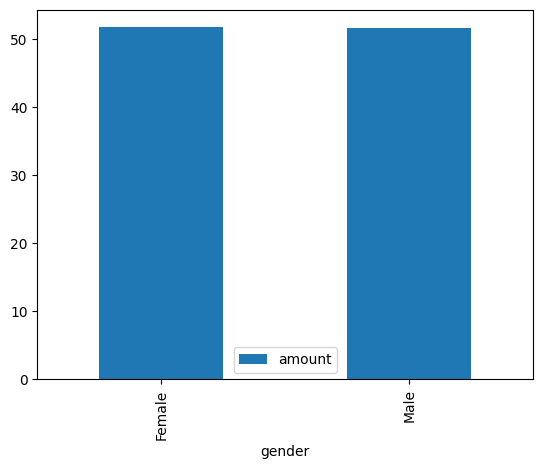

In [82]:
age_merged_df
age_merged_df.groupby('gender').aggregate({'amount':'mean'}).plot(kind = 'bar')

In [83]:
age_merged_df.head()


,id_x,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,age_band
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,Online,UNKNOWN,85711,...,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5,75-84
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015,...,Male,153 Tenth Lane,32.21,-110.88,17460.0,35602.0,55369.0,661,5,65-74
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977,...,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5,75-84
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015,...,Male,153 Tenth Lane,32.21,-110.88,17460.0,35602.0,55369.0,661,5,65-74
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712,...,Male,74786 Jefferson Drive,44.75,-85.60,20325.0,41442.0,78833.0,712,3,25-34


In [84]:
age_merged_df['date'] = pd.to_datetime(age_merged_df['date'])
age_merged_df.head()

,id_x,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,age_band
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,Online,UNKNOWN,85711,...,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5,75-84
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015,...,Male,153 Tenth Lane,32.21,-110.88,17460.0,35602.0,55369.0,661,5,65-74
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977,...,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5,75-84
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015,...,Male,153 Tenth Lane,32.21,-110.88,17460.0,35602.0,55369.0,661,5,65-74
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712,...,Male,74786 Jefferson Drive,44.75,-85.60,20325.0,41442.0,78833.0,712,3,25-34


In [86]:
age_merged_df['isDay'] = age_merged_df['date'].dt.hour.between(6,22)
age_merged_df['isWeekend'] = age_merged_df['date'].dt.weekday.between(5,6)

age_merged_df.head()

,id_x,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,age_band,isDay,isWeekend
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,Online,UNKNOWN,85711,...,34.02,-117.89,22681.0,33483.0,196.0,698,5,75-84,False,False
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015,...,32.21,-110.88,17460.0,35602.0,55369.0,661,5,65-74,True,False
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977,...,34.02,-117.89,22681.0,33483.0,196.0,698,5,75-84,True,False
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015,...,32.21,-110.88,17460.0,35602.0,55369.0,661,5,65-74,True,False
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712,...,44.75,-85.60,20325.0,41442.0,78833.0,712,3,25-34,True,False


<Axes: xlabel='gender'>

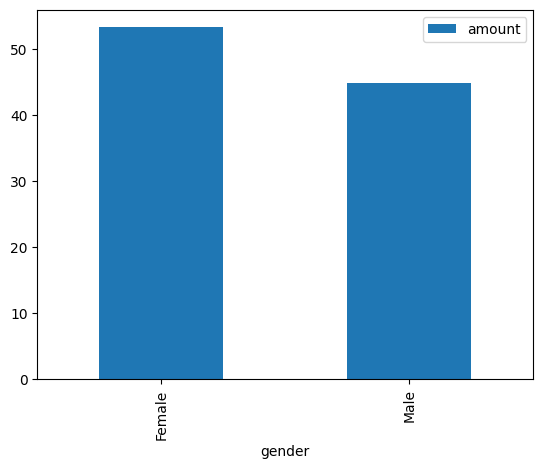

In [87]:
age_merged_df[age_merged_df['isDay']==False].groupby('gender').aggregate({'amount':'mean'}).plot(kind = 'bar')

<Axes: xlabel='gender'>

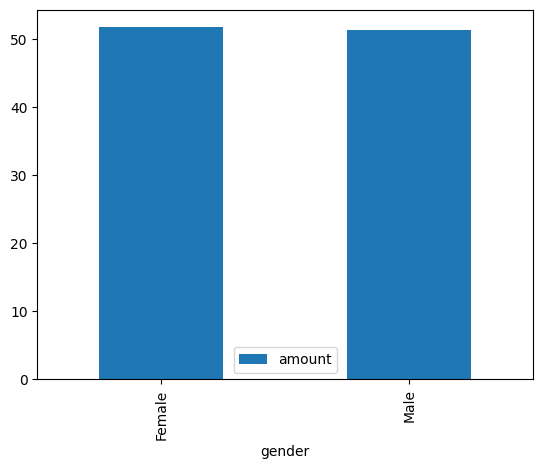

In [88]:
age_merged_df[age_merged_df['isWeekend']==False].groupby('gender').aggregate({'amount':'mean'}).plot(kind = 'bar')

So females are spending more in the night and there is no difference in the weekends for both the gender.

marketing campaign ideas : Giving more offers/discount to the males at night.